# Exercises

### Tidal dynamics

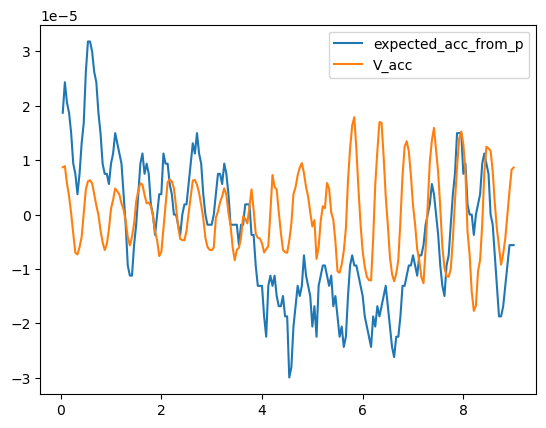

In [1]:
from getVariable import get_variable
import numpy as np
import matplotlib.pyplot as plt

# Define positions
pos1 = (176, 55)
pos2 = (176, 56)
pos3 = (176, 57)
# pos1 = (200, 249)
# pos2 = (200, 250)
# pos3 = (200, 251)

# Extract data 
V = get_variable("dataset.nc", "v-velocity", layers=10, position=pos2)
U = get_variable("dataset.nc", "u-velocity", layers=10, position=pos2)
E_inner = get_variable("dataset.nc", "elevation", position=pos1)
E_outer = get_variable("dataset.nc", "elevation", position=pos3)
t = get_variable("dataset.nc", "time")

# Calculate acceleration in V direction
V_acc = np.diff(V) / (86400 * (t[1] - t[0]))
U_acc = np.diff(U) / (86400 * (t[1] - t[0]))

# Define constants gravity and density of seawater
g = 9.81
rho_0 = 1023.6 

# Calculating dE_dx and pressure gradient
dE_dy = (E_outer - E_inner) / (800 * (abs(pos3[1] - pos1[1]))) 
dp_dy = rho_0 * g * dE_dy

# Calculating acceleration term
expected_acc_from_p = dp_dy / rho_0

# Plotting
plt.figure()
plt.plot(t[1:], expected_acc_from_p[1:], label='expected_acc_from_p')
plt.plot(t[1:], V_acc, label='V_acc')
#plt.plot(t[1:], U_acc, label='U_acc')
#plt.plot(t[:-1], p_acc[-1] - V_acc, label='p_acc - V_acc')
# plt.plot(t, V)
# plt.plot(t, U)
plt.legend()
plt.show()

# plt.figure()
# plt.plot(t, windV)
# plt.show()

## TO CHECK:
# Double check at longer term trends in the pressure
# Correlate the two - looking for negative correlation

Correlation coefficient: 0.5281294957252423
P-value: 6.495505243317896e-17


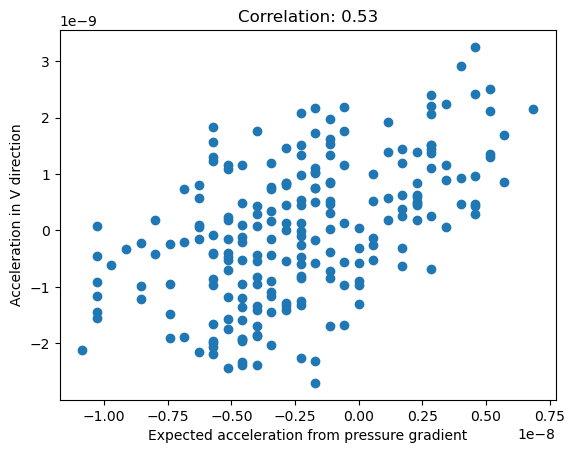

In [30]:
# Check correlation between the variables
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

correlation, p_value = pearsonr(expected_acc_from_p[1:], V_acc)

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Optional: Visualize the correlation
plt.scatter(expected_acc_from_p[1:], V_acc)
plt.xlabel("Expected acceleration from pressure gradient")
plt.ylabel("Acceleration in V direction")
plt.title(f"Correlation: {correlation:.2f}")
plt.show()

## Bathmyetry and currents

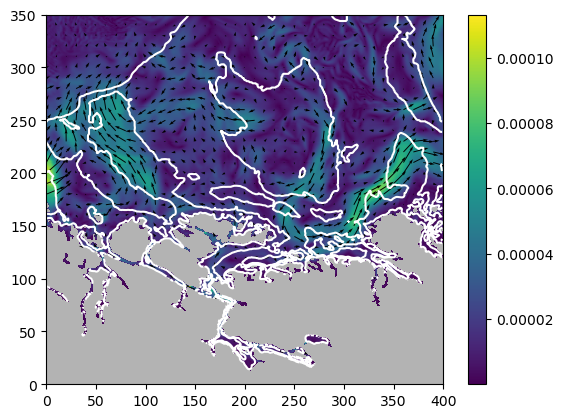

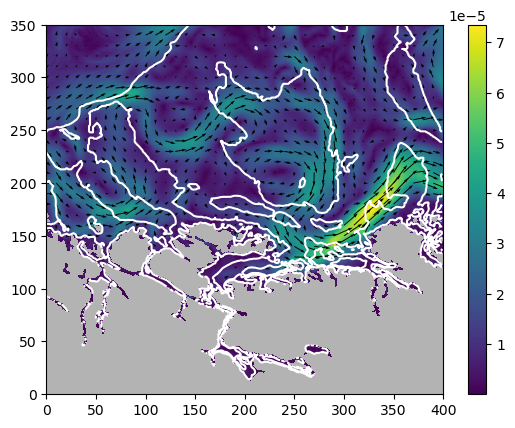

In [4]:
from getVariable import get_variable
import numpy as np
import matplotlib.pyplot as plt
from plotWithContours import plot_with_contours

time_step = 216

u_field = get_variable("dataset.nc", "u-velocity", samples=time_step, layers=10)
v_field = get_variable("dataset.nc", "v-velocity", samples=time_step, layers=10)
depth = get_variable("dataset.nc", "depth")

plot_with_contours(u_field.T, v_field.T, depth.T, 10, [100, 250, 400])

# Averaging over time
u_field_av = np.average(get_variable("dataset.nc", "u-velocity",layers=10), axis=0)
v_field_av = np.average(get_variable("dataset.nc", "v-velocity",layers=10), axis=0)

plot_with_contours(u_field_av.T, v_field_av.T, depth.T, 10, [100, 250, 400])

## Wind and vertical profiles



In [1]:
from getVariable import get_variable
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc

# Indexing
pos = (200,300)
sample = 115

# Extract data 
U = get_variable("dataset.nc", "u-velocity", pos)
V = get_variable("dataset.nc", "v-velocity", pos)
V_wind = get_variable("dataset.nc", "v-Wind", pos)
U_wind = get_variable("dataset.nc", "u-wind", pos)
t = get_variable("dataset.nc", "time")

# Get profiles
S = get_variable("dataset.nc", "salinity", pos, samples=sample)
T = get_variable("dataset.nc", "temperature", pos, samples=sample) - 273.5
LayerDepths = get_variable("dataset.nc", "LayerDepths")

current_speed = np.sqrt(U**2 + V**2)

current_dir = np.arctan2(V, U)

current_dir[current_dir<0] = current_dir[current_dir<0]+2*np.pi

wind_speed = np.sqrt(U_wind**2 + V_wind**2)

wind_dir = np.arctan2(V_wind, U_wind)

wind_dir[wind_dir<0] = wind_dir[wind_dir<0]+2*np.pi

plt.figure()
plt.plot(t, current_speed[:,0], label="current speed at 0m")
plt.plot(t, current_speed[:,10], label="current speed at 10m")
plt.plot(t, wind_speed[:]*0.025, label="Wind speed at surface")
plt.legend()
plt.show()

zcoord = np.cumsum(LayerDepths) - 0.5*LayerDepths

sample_list = [115-24,115,115+24]
for sample in sample_list:

    fig, axs = plt.subplots(2, 2)
    
    axs[0, 0].plot(S, zcoord)
    axs[0, 0].invert_yaxis()
    axs[0, 0].grid(True)
    axs[0, 0].set(xlabel='Salinity', ylabel='Depth (m)')

    axs[0, 1].plot(T[::-1], zcoord)
    axs[0, 1].invert_yaxis()
    axs[0, 1].grid(True)
    axs[0, 1].set(xlabel='Temperature', ylabel='Depth (m)')

    axs[1, 0].plot(current_speed[sample], zcoord)
    axs[1, 0].invert_yaxis()
    axs[1, 0].grid(True)
    axs[1, 0].set(xlabel='Current Speed', ylabel='Depth (m)')

    axs[1, 1].plot(current_dir[sample]*180/np.pi, zcoord)
    axs[1, 1].invert_yaxis()
    axs[1, 1].grid(True)
    axs[1, 1].set(xlabel='Current Direction', ylabel='Depth (m)')
    axs[1, 1].plot(wind_dir[sample]*180/np.pi, 0, 'k *')

    plt.subplots_adjust(hspace = 0.5)
    plt.show()

## TO DO: Check current speed values. Offset and scaling?
## Check temperature increasing with depth
## Check offset and scaling for current speed

ValueError: axes don't match array

## Comparison with observation data

/tmp/ipykernel_417113/3657143532.py:25: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, ax=axs[0, 0])
/tmp/ipykernel_417113/3657143532.py:29: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im2, ax=axs[0, 1])
/tmp/ipykernel_417113/3657143532.py:33: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im3, ax=axs[1, 0])


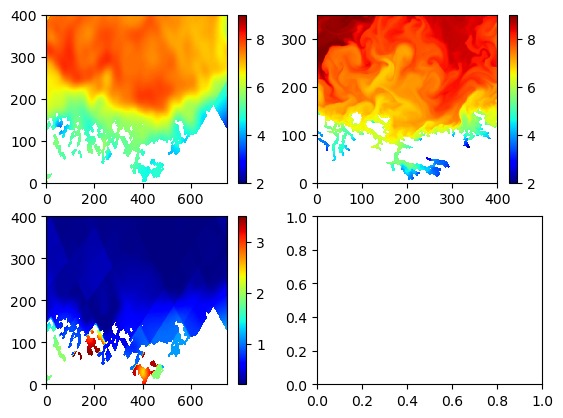

In [7]:
np.moveaxis(data_slice, 0, -1)

# Read time, sst and standard deviations from file
ds = nc.Dataset(filename)
time = ds.variables['time'][:]
sst = ds.variables['sst'][:] - 273.15
sst_stdev = ds.variables['sst_stdev'][:]

cax = [2, 9]

# Read SINMOD ds:
sFilename = 'dataset.nc'
ds_s = nc.Dataset(sFilename)
t = ds_s.variables["time"][:]
T = ds_s.variables['temperature'][:,0,:, :] - 273.15

fig, axs = plt.subplots(2, 2)

# Plot sst
im1 = axs[0, 0].pcolor(sst[0, 0, :, :], cmap='jet', vmin=cax[0], vmax=cax[1])
fig.colorbar(im1, ax=axs[0, 0])

# Plot T
im2 = axs[0, 1].pcolor(T[0,:,:], cmap='jet', vmin=cax[0], vmax=cax[1])
fig.colorbar(im2, ax=axs[0, 1])

# Plot sst_stdevT[0,:,:].
im3 = axs[1, 0].pcolor(sst_stdev[0, 0, :, :], cmap='jet')
fig.colorbar(im3, ax=axs[1, 0])

plt.show()

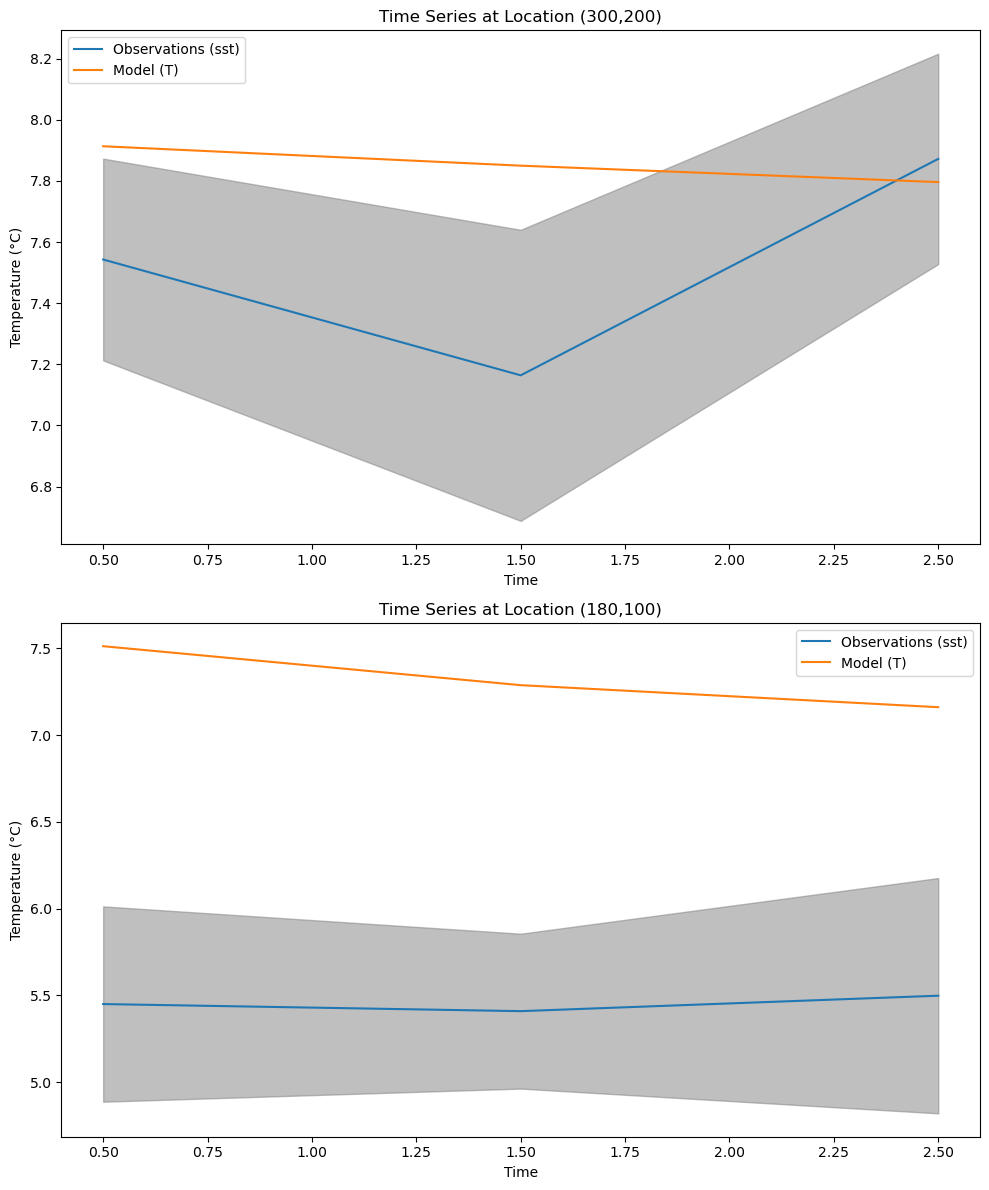

In [8]:
import numpy as np

# Choose locations
locations = [(300, 200), (180, 100)]

# Create a new figure for the time series plots
fig, axs = plt.subplots(len(locations), 1, figsize=(10, 6*len(locations)))

# Find indices where time matches
indices = np.where((ds_s["time"][:]==0.5) | (ds_s["time"][:]==1.5) | (ds_s["time"][:]==2.5))

# Loop over each location
for ax, (i, j) in zip(axs, locations):
    # Extract the time series data for this location
    sst_time_series = sst[:3,0,i, j]
    T_time_series = T[:, i, j][indices]
    sst_stdev_time_series = sst_stdev[:3, 0, i, j]

    # Plot the sst and T time series
    ax.plot(time[:3], sst_time_series, label='Observations (sst)')
    ax.plot(t[indices], T_time_series, label='Model (T)')

    # Plot the interval within ±1 standard deviation of the observations
    ax.fill_between(time[:3], sst_time_series - sst_stdev_time_series, sst_time_series + sst_stdev_time_series, color='gray', alpha=0.5)

    # Set the title and labels
    ax.set_title(f'Time Series at Location ({i},{j})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')

    # Add a legend
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
from getVariable import get_variable
import netCDF4 as nc
import numpy as np

# Dataset
filename = "dataset.nc"
dataset = nc.Dataset(filename)
# Pull data using netCDF4
temperature = dataset.variables['temperature']
scale = temperature.scale_factor
offset = temperature.add_offset
fill_value = dataset.variables['temperature']._FillValue

print("Fill Value:", fill_value)
print("Scale:", scale)
print("Offset:", offset)

raw_data = temperature[:]
scaled_data = raw_data * scale + offset
masked_data = np.ma.masked_where(scaled_data == fill_value, scaled_data)

Fill Value: -32768
Scale: 0.0048829615
Offset: 160.0


In [5]:
np.average(masked_data)

np.float64(161.38367273944354)

In [6]:
np.average(raw_data)-273.15

np.float64(7.6375854493051065)

In [9]:
print(masked_data.shape)
masked_data = masked_data.transpose(2, 3, 1, 0)
masked_data.shape

(217, 36, 350, 400)


(350, 400, 36, 217)